In [1]:
import numpy as np 
import pandas as pd

In [2]:
data = pd.read_csv('coordinate/mediapipe.csv')
df = pd.DataFrame()
column = data.columns

data

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,z11,z12,z13,z14,z15,z16,z17,z18,z19,z20
0,0.404542,0.529694,0.618953,0.571109,0.456159,0.488172,0.471621,0.500815,0.513571,0.392007,...,-0.295628,-0.184289,-0.152603,-0.370800,-0.295711,-0.200394,-0.199421,-0.310513,-0.301025,-0.270397
1,0.413549,0.550146,0.651645,0.737971,0.836858,0.512051,0.510382,0.528233,0.524869,0.414519,...,-0.207236,-0.103342,-0.085130,-0.277785,-0.211119,-0.119234,-0.125953,-0.225081,-0.205987,-0.169946
2,0.428701,0.548329,0.637850,0.704604,0.793237,0.504506,0.491109,0.479033,0.463658,0.414050,...,-0.174049,-0.119383,-0.055195,-0.233514,-0.188526,-0.127703,-0.099112,-0.213437,-0.188189,-0.153506
3,0.428534,0.562659,0.645841,0.694440,0.759962,0.534378,0.565480,0.578454,0.584854,0.440824,...,-0.072181,-0.113013,-0.024426,-0.137705,-0.149519,-0.129195,-0.076969,-0.175881,-0.193471,-0.189701
4,0.439059,0.581715,0.662364,0.692772,0.745169,0.521526,0.537720,0.543884,0.550133,0.420517,...,0.038850,0.036585,0.004781,-0.044463,-0.082956,-0.103803,-0.052091,-0.145507,-0.194990,-0.221053
5,0.447017,0.596309,0.679043,0.716606,0.780625,0.534685,0.558728,0.569463,0.577216,0.433638,...,0.148621,0.142368,0.075213,0.098014,0.095135,0.089083,0.034411,0.039586,0.025056,0.007471
6,0.514572,0.616747,0.714684,0.701367,0.608059,0.662555,0.667305,0.652828,0.654641,0.586794,...,-0.260746,-0.199339,-0.133702,-0.289219,-0.247438,-0.190969,-0.159178,-0.240119,-0.243733,-0.233799
7,0.434633,0.548404,0.647945,0.730778,0.814172,0.592030,0.584904,0.565193,0.560256,0.518701,...,-0.250368,-0.171096,-0.108478,-0.267078,-0.231009,-0.159867,-0.129585,-0.212345,-0.201338,-0.160215
8,0.447066,0.550976,0.646708,0.729267,0.815667,0.591320,0.585639,0.584468,0.580066,0.521831,...,-0.193186,-0.158614,-0.082631,-0.200177,-0.180467,-0.142757,-0.099417,-0.175042,-0.158597,-0.129840
9,0.464198,0.574634,0.674885,0.762433,0.849241,0.610422,0.638904,0.655171,0.664317,0.543433,...,-0.068412,-0.092832,-0.022918,-0.107633,-0.125738,-0.112601,-0.043194,-0.118710,-0.131411,-0.116928


In [3]:
x = data.iloc[0,0:21].T
y = data.iloc[0, 21:42].T
z = data.iloc[0,42:63].T

z= z*(y.max()-y.min())/(z.max()-z.min()) # 실제 값을 보기 쉽게 z축을 강제로 늘여봤다.

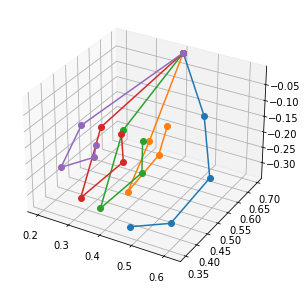

In [4]:
# 3차원 plot

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d') # Axe3D object

x0=pd.Series([x[0],*x[1:5]])
x1=pd.Series([x[0],*x[5:9]])
x2=pd.Series([x[0],*x[9:13]])
x3=pd.Series([x[0],*x[13:17]])
x4=pd.Series([x[0],*x[17:21]])

y0=pd.Series([y[0],*y[1:5]])
y1=pd.Series([y[0],*y[5:9]])
y2=pd.Series([y[0],*y[9:13]])
y3=pd.Series([y[0],*y[13:17]])
y4=pd.Series([y[0],*y[17:21]])

z0=pd.Series([z[0],*z[1:5]])
z1=pd.Series([z[0],*z[5:9]])
z2=pd.Series([z[0],*z[9:13]])
z3=pd.Series([z[0],*z[13:17]])
z4=pd.Series([z[0],*z[17:21]])

ax.plot(x0, y0, z0, marker='o',)
ax.plot(x1, y1, z1, marker='o',)
ax.plot(x2, y2, z2, marker='o',)
ax.plot(x3, y3, z3, marker='o',)
ax.plot(x4, y4, z4, marker='o',)

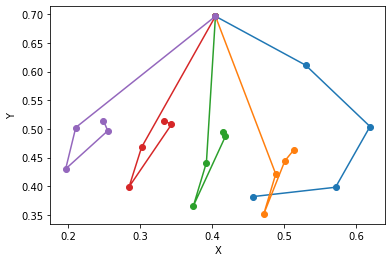

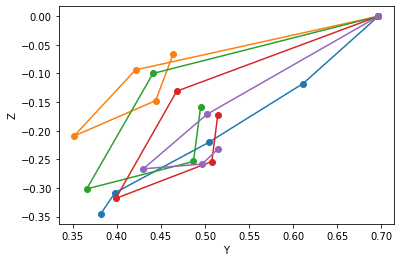

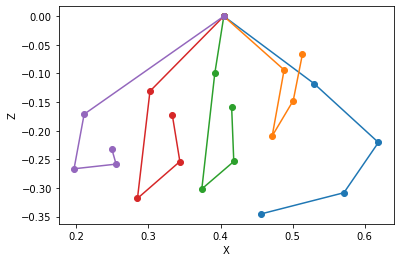

In [5]:
# 2차원 plot

plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x0,y0,marker='o')
plt.plot(x1,y1,marker='o')
plt.plot(x2,y2,marker='o')
plt.plot(x3,y3,marker='o')
plt.plot(x4,y4,marker='o')
plt.show()

plt.xlabel('Y')
plt.ylabel('Z')
plt.plot(y0,z0,marker='o')
plt.plot(y1,z1,marker='o')
plt.plot(y2,z2,marker='o')
plt.plot(y3,z3,marker='o')
plt.plot(y4,z4,marker='o')
plt.show()

plt.xlabel('X')
plt.ylabel('Z')
plt.plot(x0,z0,marker='o')
plt.plot(x1,z1,marker='o')
plt.plot(x2,z2,marker='o')
plt.plot(x3,z3,marker='o')
plt.plot(x4,z4,marker='o')
plt.show()

In [6]:
# 벡터로 변환

vector_columnList = ['v0->1', 'v1->2', 'v2->3', 'v3->4', 'v0->5', 'v5->6', 'v6->7', 'v7->8', 'v0->9', 'v9->10',
                    'v10->11', 'v11->12', 'v0->13', 'v13->14', 'v14->15', 'v15->16', 'v0->17', 'v17->18', 'v18->19','v19->20']
vector_direction = [[0,1], [1,2], [2,3], [3,4], [0,5], [5,6], [6,7], [7,8], [0,9], [9,10],
                    [10,11], [11,12], [0,13], [13,14], [14,15], [15,16], [0,17], [17,18], [18,19], [19,20]]

vector_data = []
for c, v in zip(vector_columnList, vector_direction):
    df = pd.DataFrame([data['x'+str(v[1])]-data['x'+str(v[0])]], index=['x'])
    df.loc['y'] = data['y'+str(v[1])]-data['y'+str(v[0])]
    df.loc['z'] = data['z'+str(v[1])]-data['z'+str(v[0])]
    vector_data.append(df.T)


In [7]:
# 필요한 각도 계산

degree_list = [[1,2],[2,3], [4,5], [5,6], [6,7], [8,9], [9,10], [10,11], [12,13], [13,14], [14,15], [16,17], [17,18], [18,19]]

result = pd.DataFrame()

for d in degree_list:
    a= -vector_data[d[0]].x*vector_data[d[1]].x -vector_data[d[0]].y*vector_data[d[1]].y - vector_data[d[0]].z*vector_data[d[1]].z
    b=((vector_data[d[0]].x**2 + vector_data[d[0]].y**2 + vector_data[d[0]].z**2)**0.5)*((vector_data[d[1]].x**2 + vector_data[d[1]].y**2 + vector_data[d[1]].z**2)**0.5)
    result['vec'+str(d[0])+'-'+str(d[1])] = np.arccos(a/b)*180/np.pi

result

,vec1-2,vec2-3,vec4-5,vec5-6,vec6-7,vec8-9,vec9-10,vec10-11,vec12-13,vec13-14,vec14-15,vec16-17,vec17-18,vec18-19
0,132.783976,127.366212,133.846970,25.524304,139.902590,132.288098,48.503605,116.808626,139.046997,41.395032,121.523502,149.405681,55.709608,110.826817
1,176.732121,154.115381,127.217569,25.758556,142.996784,117.578023,54.284525,108.752181,123.032209,48.036669,122.051983,129.324047,59.098790,120.519579
2,177.087003,152.286578,135.180214,176.804773,173.403587,110.184310,67.626823,117.919666,115.359032,55.772462,122.570639,125.180691,55.520581,118.220984
3,170.157172,153.759326,157.460272,170.438200,173.723876,152.396905,173.875121,178.913774,132.161945,59.923778,154.990980,139.691236,67.919197,159.985256
4,164.782787,157.273395,159.961853,170.627603,168.343707,164.709574,173.126655,172.893404,158.432903,172.267140,170.412870,129.228572,97.921082,161.274683
5,164.446704,152.843896,169.506783,172.280183,170.130629,177.320101,164.789558,170.732170,172.207789,161.215290,174.121897,176.418332,163.463794,172.923845
6,131.062153,118.020838,137.945495,29.642569,137.419957,137.889708,58.261312,111.645684,144.481722,47.000679,125.399554,151.714170,70.845870,133.539028
7,179.681940,163.743704,127.162233,53.669414,120.766205,129.007969,63.731420,99.311191,137.984740,53.016565,115.541282,148.559099,60.906926,113.767555
8,176.678589,167.521243,135.352975,178.073638,168.113807,121.405191,75.799731,125.973555,130.748323,60.416253,130.127979,143.374624,51.368778,134.554724
9,176.514172,167.742394,155.396646,171.766299,172.584224,155.262372,168.028425,176.604722,125.006989,75.346556,145.764528,133.312945,77.134942,144.239880


In [8]:
# val = (result>125).replace({True:1, False:0}) # 1: 핀거 0: 굽힌거
# val

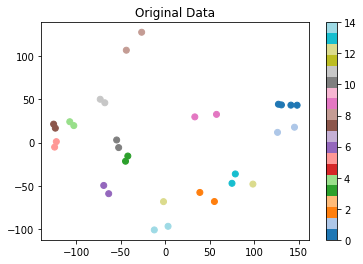

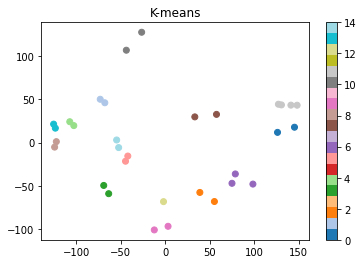

score:  92.36766516208453 %


In [9]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

label=[0,1,2,3,4,5,0,1,2,3,4,5,6,7,8,0,9,6,7,8,0,9,10,11,12,13,14,10,11,12,13,14]

pca = PCA(n_components=2)
val = pca.fit_transform(result)
df = pd.DataFrame(val, columns=['x','y'])
kmeans = KMeans(init='k-means++',n_clusters=15)
predict = kmeans.fit_predict(result)

plt.title('Original Data')
plt.scatter(df.x, df.y, c= label, cmap='tab20')
plt.colorbar()
plt.show()

plt.title('K-means')
plt.scatter(df.x, df.y, c= predict, cmap='tab20')
plt.colorbar()
plt.show()

print('score: ',adjusted_rand_score(predict, label)*100,"%")

normal_score:  92.36766516208453 %


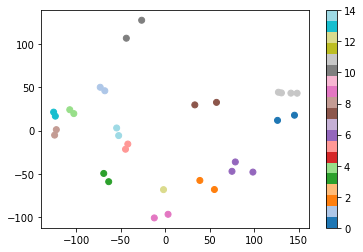

In [10]:
plt.scatter(df.x, df.y, c= predict, cmap='tab20')
plt.colorbar()

print('normal_score: ',adjusted_rand_score(predict, label)*100,"%")

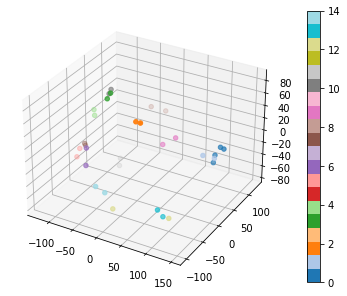

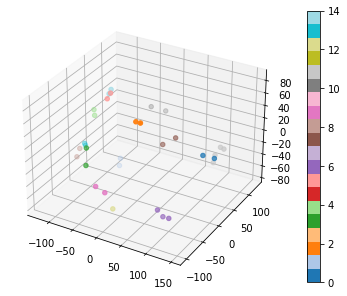

In [17]:
pca = PCA(n_components=3)
val = pca.fit_transform(result)
df = pd.DataFrame(val, columns=['x','y','z'])

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d') # Axe3D object
scat = ax.scatter(df.x, df.y, df.z, marker='o', c=label, cmap='tab20')
plt.colorbar(scat)
plt.show()

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d') # Axe3D object
scat = ax.scatter(df.x, df.y, df.z, marker='o', c=predict, cmap='tab20')
plt.colorbar(scat)
plt.show()